In [1]:
from array import array
import math
import numpy as np
import random

from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Simple Linear Fitting Example', 200, 10, 1400, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

gr = []

Welcome to JupyROOT 6.18/00


In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x

In [3]:
m = 1 #Set the order of the polynomial
n = 15 #Set the number of data points
#growing errors
#sigma = array('d')
#sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
#constraining endpoints
#sigma = array('d')
#sigma = [.7,6,5,4,3,2,1,.5,1,2,3,4,5,6,.7]
#determining zero crossing
#sigma = array('d')
#sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
#positive values - slope
sigma = array('d')
sigma = [1,1,2,2,3,3,4,4,5,5,6,6,7,7,8]
#positive values - intercept
#sigma = array('d')
#sigma = [8,7,7,6,6,5,5,4,4,3,3,2,2,1,1]

In [4]:
par = array('d')
par.append(1.80)
par.append(4.05)

random.seed(1)

for igr in range(0,1000):
    print(igr)
    x = array('d')
    y = array('d')
    jitter = array('d')
    for i in range(0,n):
        #x.append(-4.0+8.0*i/n)
        x.append(0.0+8.0*i/n)
        jitter_estimate = random.gauss(0.0,sigma[i]/3.0)
        #print(jitter_estimate)
        jitter.append(jitter_estimate)
        y.append(generator_function(x[i],par)+jitter[i])
        
    m_params = m + 1
    a = np.zeros(shape = (m_params,m_params))
    v = np.zeros(shape = (m_params,1))
    
    for k in range(0,m_params):
        for i in range(0,n):
            v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)
        #print ("v[%d] = %f" % (k,v[k][0]))
        for j in range(0,m_params):
            for i in range(0,n):
                a[k][j]=a[k][j]+math.pow(x[i],k+j)
            #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
    #print ("A matrix = ")        
    #print (a)
    #print("V matrix = ")
    #print (v)

    ainv = np.linalg.inv(a)
    u1 = np.dot(a,ainv)

    #print ("A_inverse = ")
    #print (ainv)
    #print ("Diagonal Check:")
    #print (u1)
    coeff = ainv*np.matrix(v)
    #print ("Coefficients:")
    #print (coeff)
    
    yfit = 0.0
    chi2 = 0.0
    for i in range(0,n):
        for j in range(0,m+1):
            yfit = yfit + coeff[j]*math.pow(x[i],j)
        #print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
        chi2 = chi2 + math.pow((yfit-y[i]),2)
        yfit = 0
    
    chi2perdof = chi2/(n-m-1)
    #print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))
    
    for k in range(0,m+1):
        print("k = %d, err = %f" % (k,math.pow(ainv[k][k]*chi2perdof,0.5)))
        
    gr.append(TGraph(n,x,y))
    #print (igr)

    pfit1 = TF1("pfit1","pol1")
    gr[igr].SetMarkerStyle(21)
    gr[igr].SetTitle("Linear Fit")
    gr[igr].GetXaxis().SetTitle("X")
    gr[igr].GetYaxis().SetTitle("Y")
    gr[igr].GetHistogram().SetMaximum(37.0)
    gr[igr].GetHistogram().SetMinimum(-10.0)

    gr[igr].Fit("pfit1","q")
    pfit1chi2 = pfit1.GetChisquare()
    pfit1ndf = pfit1.GetNDF()
    pfit1chi2ndf = pfit1chi2/pfit1ndf
    #print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
    if (igr == 0):
        gr[igr].Draw("AP")
    else:
        gr[igr].Draw("P")

0
k = 0, err = 0.611830
k = 1, err = 0.139458
1
k = 0, err = 0.562687
k = 1, err = 0.128257
2
k = 0, err = 0.652636
k = 1, err = 0.148760
3
k = 0, err = 0.716226
k = 1, err = 0.163254
4
k = 0, err = 0.712995
k = 1, err = 0.162518
5
k = 0, err = 0.822238
k = 1, err = 0.187418
6
k = 0, err = 0.817971
k = 1, err = 0.186445
7
k = 0, err = 0.945424
k = 1, err = 0.215497
8
k = 0, err = 0.403667
k = 1, err = 0.092010
9
k = 0, err = 0.825574
k = 1, err = 0.188178
10
k = 0, err = 0.954781
k = 1, err = 0.217630
11
k = 0, err = 0.868664
k = 1, err = 0.198000
12
k = 0, err = 0.836026
k = 1, err = 0.190561
13
k = 0, err = 0.613892
k = 1, err = 0.139928
14
k = 0, err = 0.719414
k = 1, err = 0.163981
15
k = 0, err = 0.620178
k = 1, err = 0.141361
16
k = 0, err = 0.589137
k = 1, err = 0.134286
17
k = 0, err = 0.544025
k = 1, err = 0.124003
18
k = 0, err = 0.604472
k = 1, err = 0.137781
19
k = 0, err = 0.812779
k = 1, err = 0.185262
20
k = 0, err = 0.750521
k = 1, err = 0.171071
21
k = 0, err = 0.65220

k = 0, err = 0.542389
k = 1, err = 0.123630
253
k = 0, err = 0.712536
k = 1, err = 0.162413
254
k = 0, err = 0.517557
k = 1, err = 0.117970
255
k = 0, err = 0.795019
k = 1, err = 0.181214
256
k = 0, err = 0.701608
k = 1, err = 0.159922
257
k = 0, err = 0.504547
k = 1, err = 0.115005
258
k = 0, err = 0.867857
k = 1, err = 0.197816
259
k = 0, err = 0.560816
k = 1, err = 0.127830
260
k = 0, err = 0.620740
k = 1, err = 0.141489
261
k = 0, err = 1.043271
k = 1, err = 0.237799
262
k = 0, err = 0.741993
k = 1, err = 0.169127
263
k = 0, err = 1.040255
k = 1, err = 0.237112
264
k = 0, err = 0.765425
k = 1, err = 0.174468
265
k = 0, err = 1.033544
k = 1, err = 0.235582
266
k = 0, err = 0.505123
k = 1, err = 0.115136
267
k = 0, err = 1.060855
k = 1, err = 0.241808
268
k = 0, err = 0.605318
k = 1, err = 0.137974
269
k = 0, err = 1.104632
k = 1, err = 0.251786
270
k = 0, err = 0.758314
k = 1, err = 0.172847
271
k = 0, err = 1.251604
k = 1, err = 0.285286
272
k = 0, err = 0.583771
k = 1, err = 0.133

k = 0, err = 0.991432
k = 1, err = 0.225984
442
k = 0, err = 0.748584
k = 1, err = 0.170630
443
k = 0, err = 1.047940
k = 1, err = 0.238864
444
k = 0, err = 0.994622
k = 1, err = 0.226711
445
k = 0, err = 0.823174
k = 1, err = 0.187631
446
k = 0, err = 0.527942
k = 1, err = 0.120337
447
k = 0, err = 0.585371
k = 1, err = 0.133427
448
k = 0, err = 0.428336
k = 1, err = 0.097633
449
k = 0, err = 0.513077
k = 1, err = 0.116949
450
k = 0, err = 0.908491
k = 1, err = 0.207078
451
k = 0, err = 0.654297
k = 1, err = 0.149138
452
k = 0, err = 0.604518
k = 1, err = 0.137792
453
k = 0, err = 0.627608
k = 1, err = 0.143055
454
k = 0, err = 0.712038
k = 1, err = 0.162299
455
k = 0, err = 0.705793
k = 1, err = 0.160876
456
k = 0, err = 0.845213
k = 1, err = 0.192655
457
k = 0, err = 0.562129
k = 1, err = 0.128130
458
k = 0, err = 0.656303
k = 1, err = 0.149595
459
k = 0, err = 0.925401
k = 1, err = 0.210933
460
k = 0, err = 0.937635
k = 1, err = 0.213721
461
k = 0, err = 0.552216
k = 1, err = 0.125

640
k = 0, err = 0.644029
k = 1, err = 0.146798
641
k = 0, err = 0.568673
k = 1, err = 0.129621
642
k = 0, err = 1.044962
k = 1, err = 0.238185
643
k = 0, err = 0.814006
k = 1, err = 0.185542
644
k = 0, err = 0.518804
k = 1, err = 0.118254
645
k = 0, err = 0.580126
k = 1, err = 0.132232
646
k = 0, err = 0.948061
k = 1, err = 0.216098
647
k = 0, err = 0.682078
k = 1, err = 0.155470
648
k = 0, err = 1.033228
k = 1, err = 0.235510
649
k = 0, err = 0.645959
k = 1, err = 0.147238
650
k = 0, err = 0.758296
k = 1, err = 0.172843
651
k = 0, err = 0.705598
k = 1, err = 0.160832
652
k = 0, err = 0.857991
k = 1, err = 0.195567
653
k = 0, err = 0.703567
k = 1, err = 0.160369
654
k = 0, err = 0.941971
k = 1, err = 0.214710
655
k = 0, err = 0.655648
k = 1, err = 0.149446
656
k = 0, err = 0.538959
k = 1, err = 0.122849
657
k = 0, err = 0.852651
k = 1, err = 0.194350
658
k = 0, err = 0.665085
k = 1, err = 0.151597
659
k = 0, err = 0.745222
k = 1, err = 0.169863
660
k = 0, err = 0.464140
k = 1, err = 0

819
k = 0, err = 0.689288
k = 1, err = 0.157114
820
k = 0, err = 0.578347
k = 1, err = 0.131826
821
k = 0, err = 0.660639
k = 1, err = 0.150584
822
k = 0, err = 0.943448
k = 1, err = 0.215046
823
k = 0, err = 0.552929
k = 1, err = 0.126033
824
k = 0, err = 0.763896
k = 1, err = 0.174120
825
k = 0, err = 0.394562
k = 1, err = 0.089935
826
k = 0, err = 0.697219
k = 1, err = 0.158922
827
k = 0, err = 0.955684
k = 1, err = 0.217835
828
k = 0, err = 0.844570
k = 1, err = 0.192508
829
k = 0, err = 0.871945
k = 1, err = 0.198748
830
k = 0, err = 0.834189
k = 1, err = 0.190142
831
k = 0, err = 0.790489
k = 1, err = 0.180181
832
k = 0, err = 0.772918
k = 1, err = 0.176176
833
k = 0, err = 0.770481
k = 1, err = 0.175621
834
k = 0, err = 0.816354
k = 1, err = 0.186077
835
k = 0, err = 0.643738
k = 1, err = 0.146731
836
k = 0, err = 0.672201
k = 1, err = 0.153219
837
k = 0, err = 0.629893
k = 1, err = 0.143576
838
k = 0, err = 0.992547
k = 1, err = 0.226238
839
k = 0, err = 0.603519
k = 1, err = 0

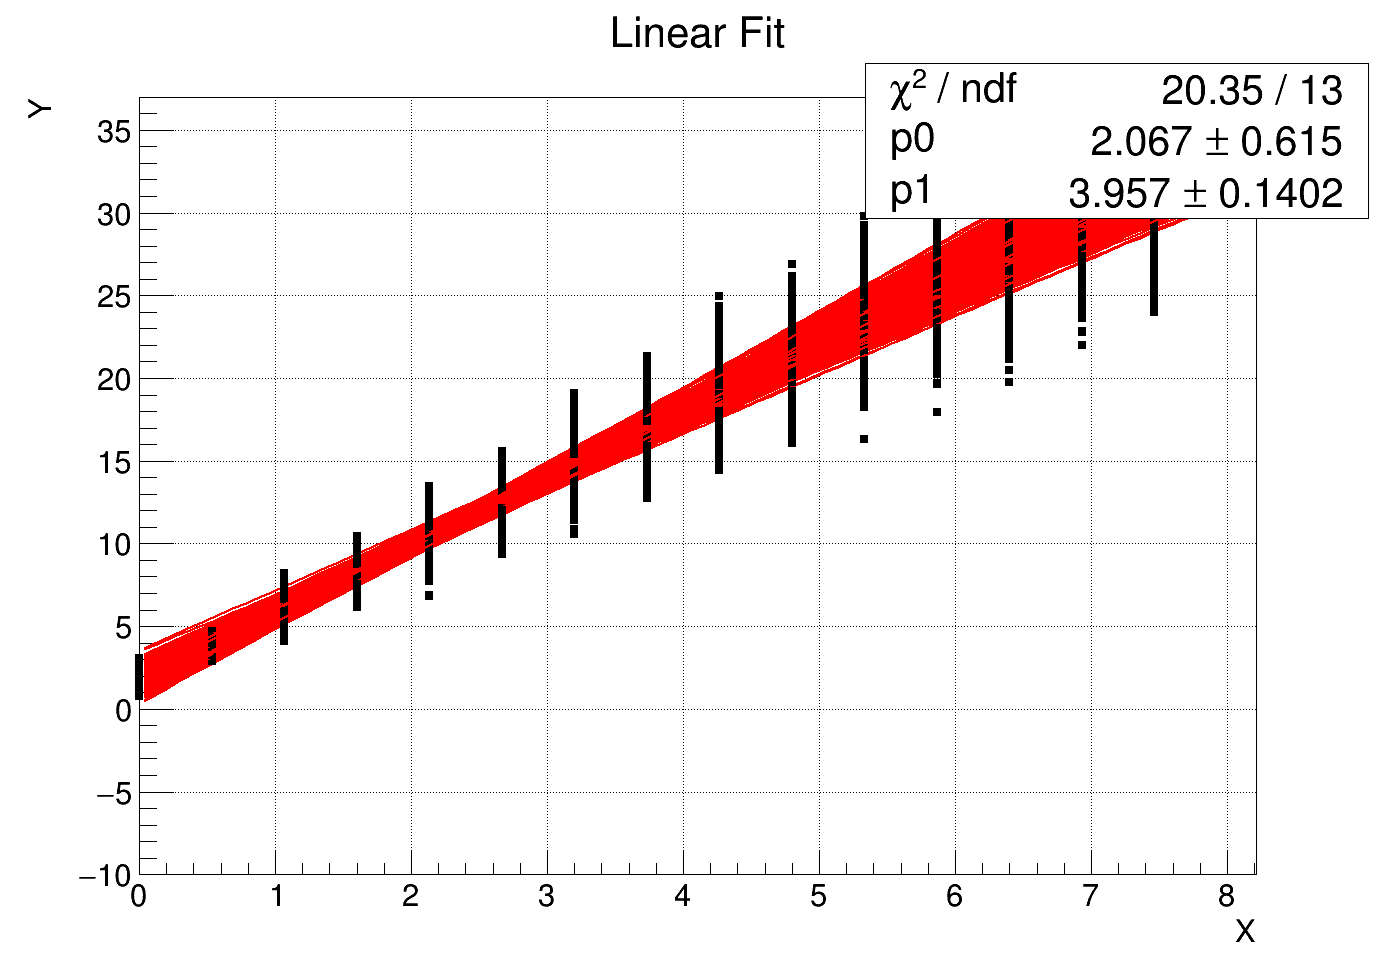

In [5]:
c1.Draw()